Threads.nthreads() = 12
  4.959890 seconds (97.94 k allocations: 5.288 MiB, 0.99% compilation time)
  8.007846 seconds (63.93 k allocations: 3.493 MiB, 0.39% compilation time)
  8.644187 seconds (87.74 k allocations: 4.832 MiB, 0.00% compilation time)
(mean(pi1), std(pi1)) = (3.1416076064, 0.0016270710121832133)
(mean(pi2), std(pi2)) = (3.1415681355999996, 0.0009792823565274822)
(mean(pi3), std(pi3)) = (3.1415973263890913, 0.0003746847754350911)


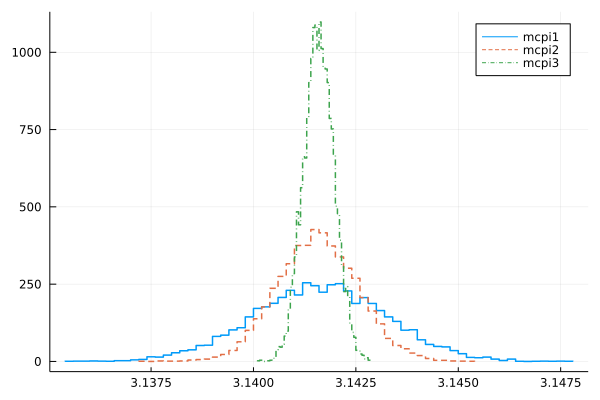

In [1]:
using Statistics
using Plots

function mcpi1(n)
    c = 0
    for _ in 1:n
        c += rand()^2 + rand()^2 ≤ 1
    end
    4c/n
end

function mcpi2(n)
    c = 0
    for _ in 1:n
        x, y = rand(), rand()
        c += (x^2 + y^2 ≤ 1 && (1 - x)^2 + (1 - y)^2 ≤ 1)
    end
    2c/n + 2
end

function mcpi3(n)
    c = 0
    for _ in 1:n
        x, y = rand(), (1 - √3/2)*rand() + √3/2
        c += (x^2 + y^2 > 1 && (1 - x)^2 + y^2 > 1)
    end
    6(1 - √3/4 - (1 - √3/2)*c/n)
end

function sim(mcpi, n, L)
    X = Vector{Float64}(undef, L)
    Threads.@threads for i in 1:L
        X[i] = mcpi(n)
    end
    X
end

@show Threads.nthreads()
@time pi1 = sim(mcpi1, 10^6, 10^4)
@time pi2 = sim(mcpi2, 10^6, 10^4)
@time pi3 = sim(mcpi3, 10^6, 10^4)

@show mean(pi1), std(pi1)
@show mean(pi2), std(pi2)
@show mean(pi3), std(pi3)

plot()
stephist!(pi1; norm=true, label="mcpi1", lw=1.5, ls=:solid)
stephist!(pi2; norm=true, label="mcpi2", lw=1.5, ls=:dash)
stephist!(pi3; norm=true, label="mcpi3", lw=1.5, ls=:dashdot)


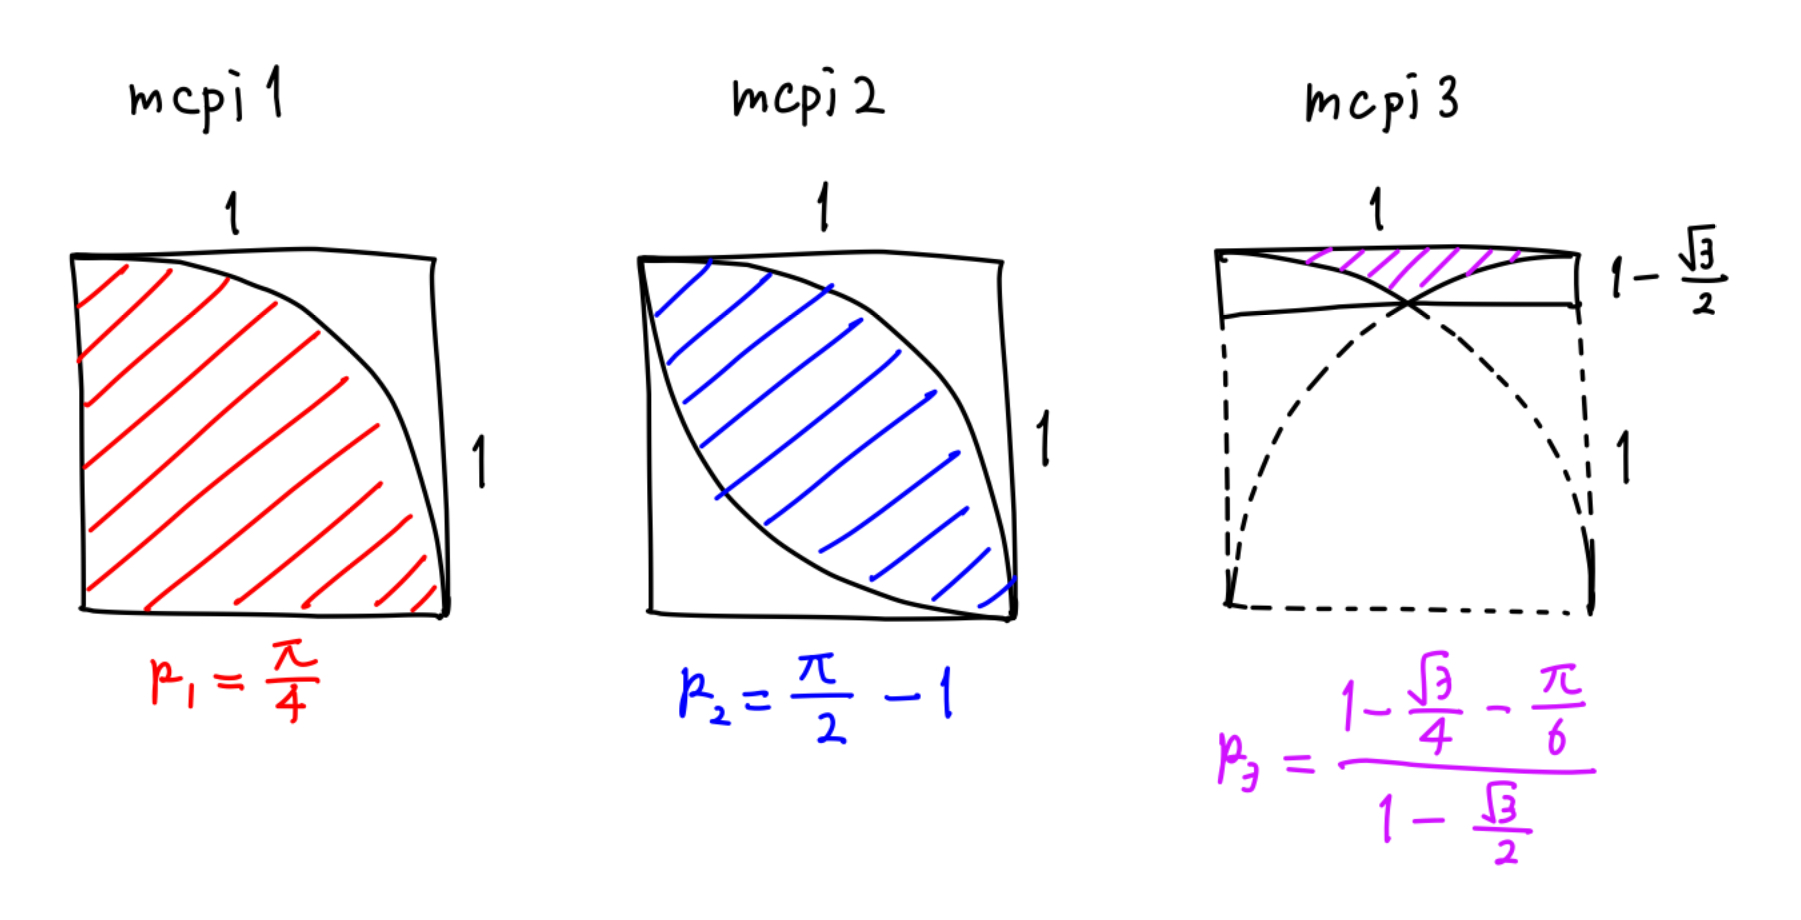

In [2]:
using Base64
showimg(mime, fn; tag="img") = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<$tag src="data:$mime;base64,$base64" />""")
end
showimg("image/jpeg", "1BD08057-D77D-44FF-9D3A-7620DA4CF740.jpeg"; tag="img width=80%")